In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv(r"C:\Users\user\Desktop\insurance.csv")

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
df.duplicated().any()

True

In [24]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [29]:
***** to know the average age
df['age'].mean()

39.20702541106129

In [32]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [36]:

df['age'].min()

18

In [38]:
df['age'].max()

64

In [41]:
df['bmi'].mean()

30.66339686098655

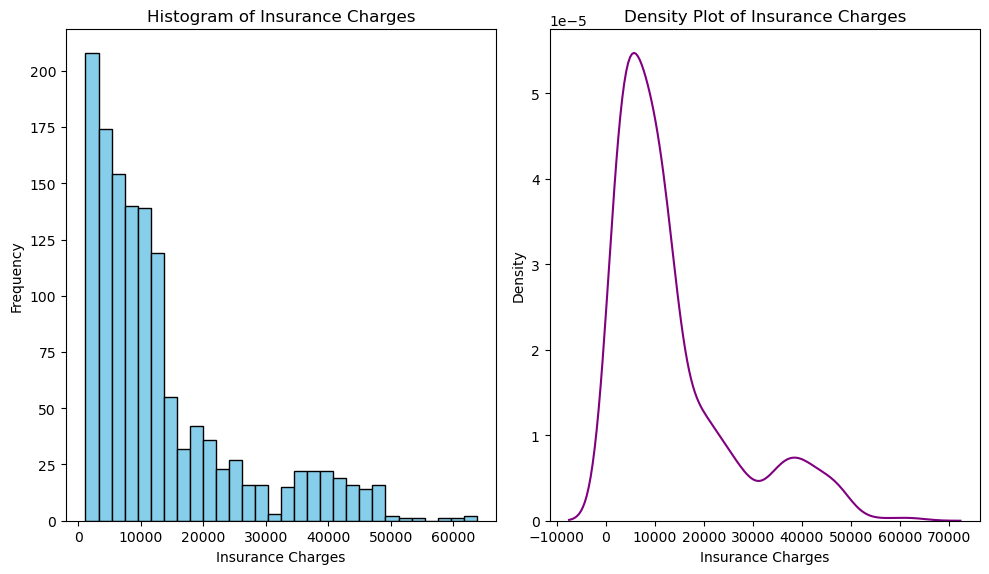

In [43]:
# Plot histogram and density plot for 'charges'
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Insurance Charges')

# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['charges'], color='purple')
plt.xlabel('Insurance Charges')
plt.ylabel('Density')
plt.title('Density Plot of Insurance Charges')

plt.tight_layout()
plt.show()

Correlation between age and charges: 0.29900819333064765


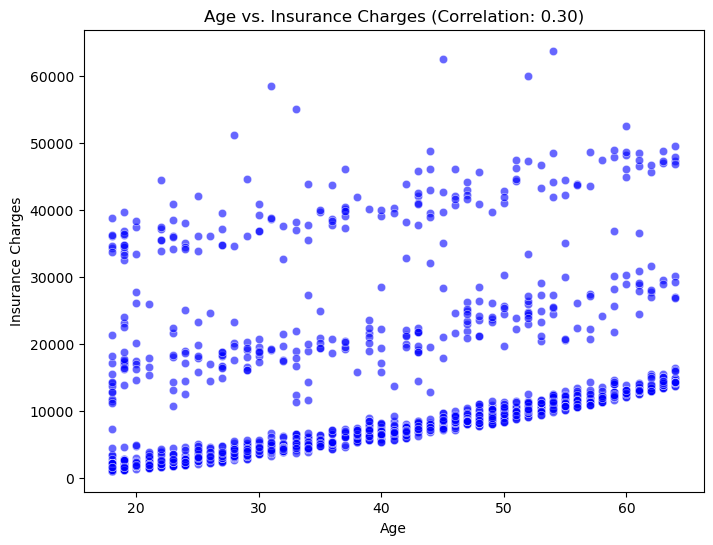

In [57]:
##### Age vs. Charges*: Is there a correlation between age and insurance charges?

# Calculate the correlation
correlation = df['age'].corr(df['charges'])
print("Correlation between age and charges:", correlation)

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=df, color='blue', alpha=0.6) 
plt.title(f'Age vs. Insurance Charges (Correlation: {correlation:.2f})')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

Correlation between BMI and charges: 0.1983409688336289


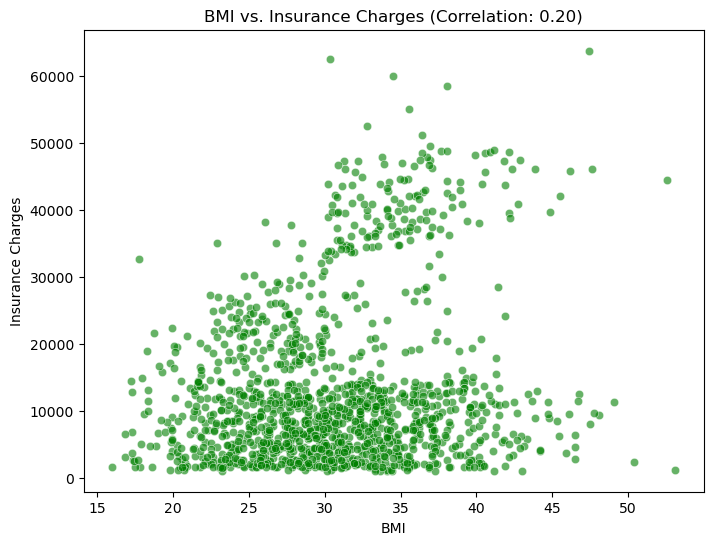

In [47]:
# Calculate the correlation between BMI and charges
correlation_bmi_charges = df['bmi'].corr(df['charges'])
print("Correlation between BMI and charges:", correlation_bmi_charges)

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df, color='green', alpha=0.6)
plt.title(f'BMI vs. Insurance Charges (Correlation: {correlation_bmi_charges:.2f})')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

In [49]:
# Calculate the average insurance charges for each gender
average_charges_by_gender = df.groupby('sex')['charges'].mean()
print("Average insurance charges by gender:")
print(average_charges_by_gender)

Average insurance charges by gender:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [51]:
# Calculate the average insurance charges for smokers and non-smokers
average_charges_by_smoker = df.groupby('smoker')['charges'].mean()
print("Average insurance charges by smoking status:")
print(average_charges_by_smoker)

Average insurance charges by smoking status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


Correlation between number of children and charges: 0.06799822684790487


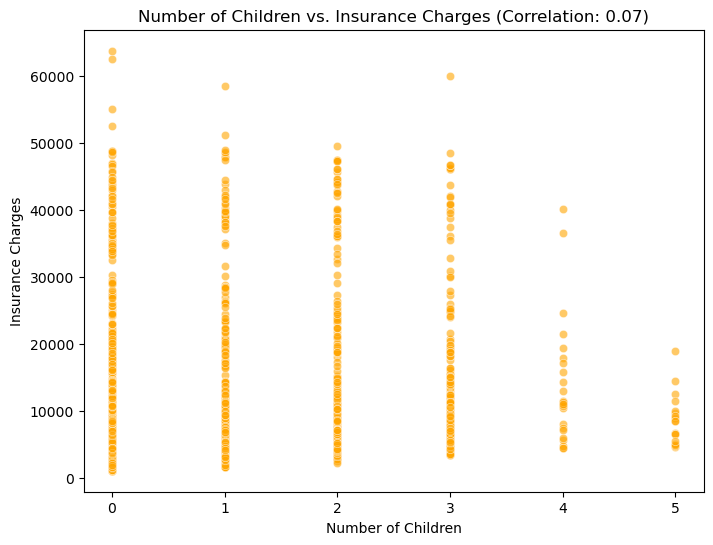

In [59]:
# Calculate the correlation between the number of children and charges
correlation_children_charges = df['children'].corr(df['charges'])
print("Correlation between number of children and charges:", correlation_children_charges)

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='children', y='charges', data=df, color='orange', alpha=0.6)
plt.title(f'Number of Children vs. Insurance Charges (Correlation: {correlation_children_charges:.2f})')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.show()

In [61]:
# Calculate the average insurance charges by region
average_charges_by_region = df.groupby('region')['charges'].mean()
print("Average insurance charges by region:")
print(average_charges_by_region)

# Identify the region with the highest average charge
highest_avg_charge_region = average_charges_by_region.idxmax()
highest_avg_charge = average_charges_by_region.max()
print(f"\nRegion with the highest average charge: {highest_avg_charge_region} (${highest_avg_charge:.2f})")

Average insurance charges by region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Region with the highest average charge: southeast ($14735.41)


Average insurance charges by smoking status and region:
smoker              no           yes
region                              
northeast  9165.531672  29673.536473
northwest  8556.463715  30192.003182
southeast  8032.216309  34844.996824
southwest  8019.284513  32269.063494


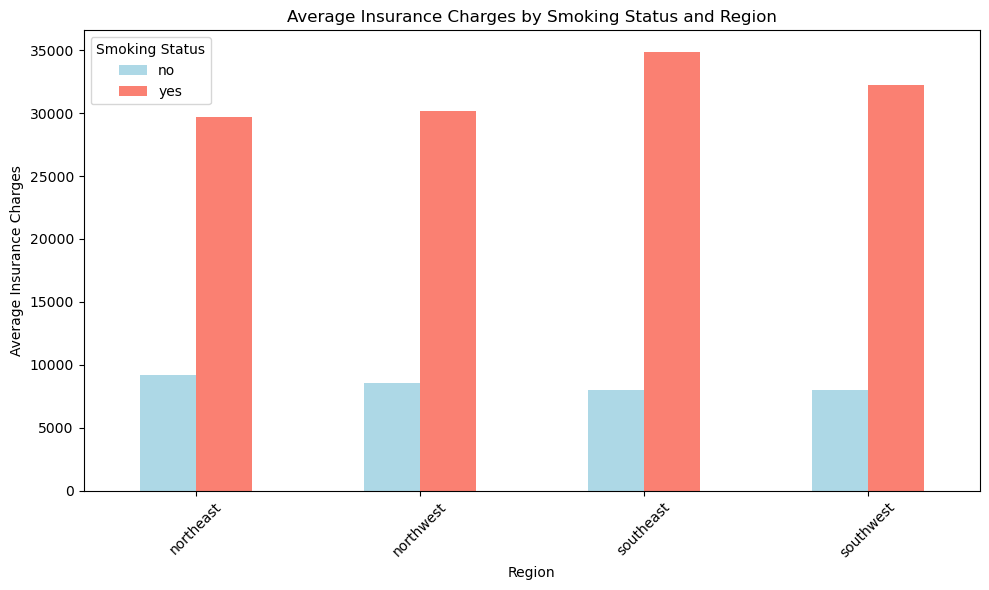

In [63]:
# Calculate the average insurance charges for smokers and non-smokers by region
average_charges_by_smoking_and_region = df.groupby(['region', 'smoker'])['charges'].mean().unstack()
print("Average insurance charges by smoking status and region:")
print(average_charges_by_smoking_and_region)

# Optional: To visualize this data using a bar plot
average_charges_by_smoking_and_region.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Average Insurance Charges by Smoking Status and Region')
plt.xlabel('Region')
plt.ylabel('Average Insurance Charges')
plt.xticks(rotation=45)
plt.legend(title='Smoking Status')
plt.tight_layout()
plt.show()

In [65]:
# Calculate the total number of males and females
total_by_gender = df['sex'].value_counts()

# Calculate the number of smokers by gender
smokers_by_gender = df[df['smoker'] == 'yes']['sex'].value_counts()

# Calculate the percentage of smokers for each gender
percentage_smokers_by_gender = (smokers_by_gender / total_by_gender) * 100

print("Percentage of smokers by gender:")
print(percentage_smokers_by_gender)

Percentage of smokers by gender:
sex
male      23.520710
female    17.371601
Name: count, dtype: float64


In [67]:
# Set the threshold for high insurance charges
threshold = 20000

# Filter individuals with charges above the threshold
high_cost_individuals = df[df['charges'] > threshold]

# Calculate average BMI, age, and smoking status for these individuals
average_bmi = high_cost_individuals['bmi'].mean()
average_age = high_cost_individuals['age'].mean()
smoking_status_distribution = high_cost_individuals['smoker'].value_counts(normalize=True) * 100

print("Average BMI of high-cost individuals:", average_bmi)
print("Average age of high-cost individuals:", average_age)
print("\nSmoking status distribution among high-cost individuals:")
print(smoking_status_distribution)

Average BMI of high-cost individuals: 32.11300366300367
Average age of high-cost individuals: 42.45787545787546

Smoking status distribution among high-cost individuals:
smoker
yes    77.655678
no     22.344322
Name: proportion, dtype: float64


Distribution of the number of children:
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


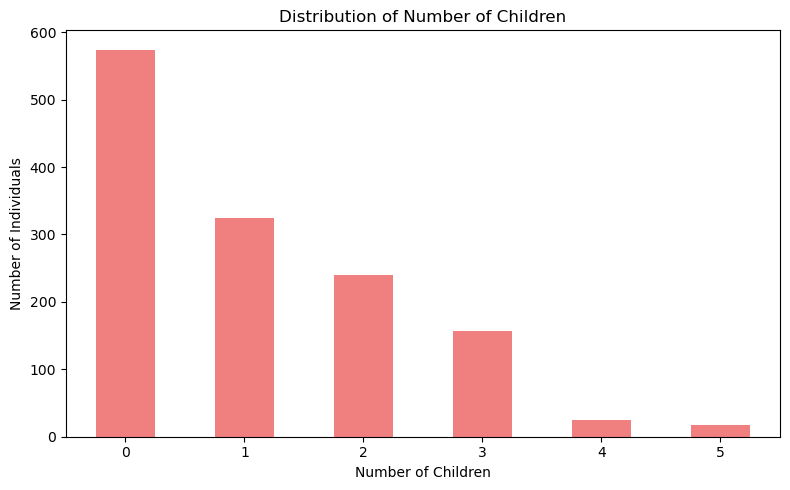

In [69]:
# Count the number of individuals with each count of children
children_distribution = df['children'].value_counts().sort_index()

print("Distribution of the number of children:")
print(children_distribution)

# Optional: Visualize the distribution with a bar plot
plt.figure(figsize=(8, 5))
children_distribution.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [71]:
# Define age bins and corresponding labels
age_bins = [18, 30, 45, 60, 100]  # Adjust the upper limit as necessary
age_labels = ['18-30', '31-45', '46-60', '61+']

# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the average insurance charges for each age group
average_charges_by_age_group = df.groupby('age_group')['charges'].mean()

print("Average insurance charges by age group:")
print(average_charges_by_age_group)

Average insurance charges by age group:
age_group
18-30     9182.487125
31-45    12490.912530
46-60    15922.929285
61+      21248.021885
Name: charges, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_12664\2772172664.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_charges_by_age_group = df.groupby('age_group')['charges'].mean()


Mean Squared Error: 131440262.76
R^2 Score: 0.15


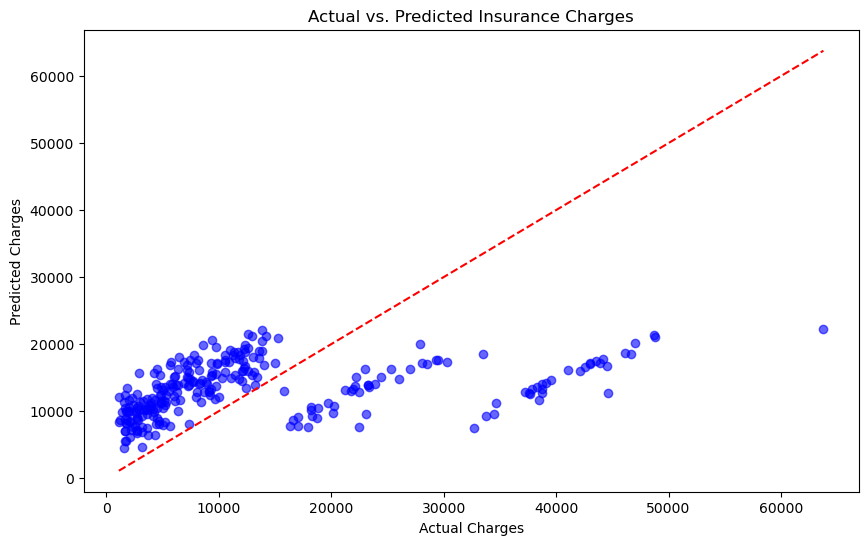

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data: Create your DataFrame here
# df = pd.DataFrame({
#     'age': [...],
#     'bmi': [...],
#     'charges': [...]
# })

# Select features and target variable
X = df[['age', 'bmi']]  # Features: age and BMI
y = df['charges']       # Target: insurance charges

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Plotting the predictions against actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.show()
